In [1]:
import numpy as np
from sympy import symbols, Matrix, simplify, pprint
import matplotlib.pyplot as plt
from pyscf import gto, scf
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts

In [2]:
Styrene = """
  C    0.0000000    0.3705681    2.9744693
  C    0.0000000   -0.5377330    1.9899643
  C    0.0000000   -0.2198770    0.5350858
  C    0.0000000   -1.2891808   -0.3790048
  C    0.0000000   -1.0503841   -1.7564567
  C    0.0000000    0.2587518   -2.2400258
  C    0.0000000    1.3314055   -1.3467646
  C    0.0000000    1.0994127    0.0326785
  H    0.0000000    0.0372889    4.0073999
  H    0.0000000    1.4372560    2.7942895
  H    0.0000000   -1.5842539    2.2834225
  H    0.0000000   -2.3136447   -0.0266960
  H    0.0000000   -1.8819740   -2.4493180
  H    0.0000000    0.4421446   -3.3067392
  H    0.0000000    2.3461279   -1.7237485
  H    0.0000000    1.9584017    0.6861456
"""
extra_bounds = [(2,7)]

# Converteer de coördinaten naar een NumPy-array
carbon_coordinates = pts.taking_carbon_coordinates(Styrene)
coordinates = pts.taking_x_and_y_coordinate(carbon_coordinates)
print(coordinates)
styrene_molecule = gto.M(atom=Styrene, basis='sto-3g')#'sto-6g''ccpvdz'

pz_indices = pts.taking_indices(styrene_molecule, ['C 2px'])
print(pz_indices)

hf = scf.RHF(styrene_molecule)
hf_energy = hf.kernel()

[[ 2.9744693  0.3705681]
 [ 1.9899643 -0.537733 ]
 [ 0.5350858 -0.219877 ]
 [-0.3790048 -1.2891808]
 [-1.7564567 -1.0503841]
 [-2.2400258  0.2587518]
 [-1.3467646  1.3314055]
 [ 0.0326785  1.0994127]]
[2, 7, 12, 17, 22, 27, 32, 37]
converged SCF energy = -303.83141009125


In [3]:
S_styrene = hf.get_ovlp()[[2, 7, 12, 17, 22, 27, 32, 37]][:, [2, 7, 12, 17, 22, 27, 32, 37]]
print(S_styrene)

[[1.00000000e+00 2.37479167e-01 2.05187374e-02 6.68509964e-04
  9.70652715e-06 3.17021292e-06 6.69816074e-05 5.37632013e-03]
 [2.37479167e-01 1.00000000e+00 1.80800278e-01 2.17680201e-02
  5.90013516e-04 1.03356151e-04 5.14214007e-04 1.85338147e-02]
 [2.05187374e-02 1.80800278e-01 1.00000000e+00 2.10427585e-01
  2.44058199e-02 9.51951752e-03 2.43236125e-02 2.08539279e-01]
 [6.68509964e-04 2.17680201e-02 2.10427585e-01 1.00000000e+00
  2.13801052e-01 2.53942633e-02 1.00915505e-02 2.52044607e-02]
 [9.70652715e-06 5.90013516e-04 2.44058199e-02 2.13801052e-01
  1.00000000e+00 2.14735229e-01 2.56276043e-02 1.00050931e-02]
 [3.17021292e-06 1.03356151e-04 9.51951752e-03 2.53942633e-02
  2.14735229e-01 1.00000000e+00 2.14620213e-01 2.52409806e-02]
 [6.69816074e-05 5.14214007e-04 2.43236125e-02 1.00915505e-02
  2.56276043e-02 2.14620213e-01 1.00000000e+00 2.13484431e-01]
 [5.37632013e-03 1.85338147e-02 2.08539279e-01 2.52044607e-02
  1.00050931e-02 2.52409806e-02 2.13484431e-01 1.00000000e+00]]

In [4]:
n = 8
H_styrene = np.zeros((n, n))
print(H_styrene)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
alpha_C = -11.4
K = 1.75
for i in range(n):
    H_styrene[i, i] = alpha_C

print(H_styrene)

[[-11.4   0.    0.    0.    0.    0.    0.    0. ]
 [  0.  -11.4   0.    0.    0.    0.    0.    0. ]
 [  0.    0.  -11.4   0.    0.    0.    0.    0. ]
 [  0.    0.    0.  -11.4   0.    0.    0.    0. ]
 [  0.    0.    0.    0.  -11.4   0.    0.    0. ]
 [  0.    0.    0.    0.    0.  -11.4   0.    0. ]
 [  0.    0.    0.    0.    0.    0.  -11.4   0. ]
 [  0.    0.    0.    0.    0.    0.    0.  -11.4]]


In [6]:
for i in range(n):
    for j in range(n):
        if i != j:
            H_styrene[i, j] = H_styrene[j, i] = K*S_styrene[i,j]*(H_styrene[i,i]+H_styrene[j,j])/2
print(H_styrene)

[[-1.14000000e+01 -4.73770937e+00 -4.09348811e-01 -1.33367738e-02
  -1.93645217e-04 -6.32457478e-05 -1.33628307e-03 -1.07257587e-01]
 [-4.73770937e+00 -1.14000000e+01 -3.60696555e+00 -4.34272000e-01
  -1.17707697e-02 -2.06195522e-03 -1.02585694e-02 -3.69749604e-01]
 [-4.09348811e-01 -3.60696555e+00 -1.14000000e+01 -4.19803032e+00
  -4.86896106e-01 -1.89914375e-01 -4.85256068e-01 -4.16035862e+00]
 [-1.33367738e-02 -4.34272000e-01 -4.19803032e+00 -1.14000000e+01
  -4.26533098e+00 -5.06615554e-01 -2.01326432e-01 -5.02828992e-01]
 [-1.93645217e-04 -1.17707697e-02 -4.86896106e-01 -4.26533098e+00
  -1.14000000e+01 -4.28396783e+00 -5.11270707e-01 -1.99601607e-01]
 [-6.32457478e-05 -2.06195522e-03 -1.89914375e-01 -5.06615554e-01
  -4.28396783e+00 -1.14000000e+01 -4.28167326e+00 -5.03557564e-01]
 [-1.33628307e-03 -1.02585694e-02 -4.85256068e-01 -2.01326432e-01
  -5.11270707e-01 -4.28167326e+00 -1.14000000e+01 -4.25901440e+00]
 [-1.07257587e-01 -3.69749604e-01 -4.16035862e+00 -5.02828992e-01
  -

In [7]:
from scipy.linalg import fractional_matrix_power
A_styrene = fractional_matrix_power(S_styrene, -0.5)
A_styrene = np.asarray(A_styrene)

In [8]:
H_styrene_p = A_styrene @ H_styrene @ A_styrene
epsilon, C_p = np.linalg.eigh(H_styrene_p)

print(epsilon, C_p)
C = A_styrene @ C_p
print(C)
eigenvalues = epsilon
print(eigenvalues)
for i in range(n):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]

print(C)


[-14.29367963 -13.36531853 -12.69327581 -12.32157408  -9.48237094
  -8.85922556  -7.79021503  -5.70167501] [[-0.14556773  0.47075121 -0.01521685  0.52739199 -0.54263603 -0.01868771
  -0.406062    0.13834751]
 [-0.26338241  0.56446961 -0.0021571   0.31226513  0.3937944   0.00613766
   0.53747791 -0.26550968]
 [-0.46350525  0.315045    0.00798062 -0.41626358  0.38139846  0.02874104
  -0.35307307  0.4915476 ]
 [-0.3967491   0.00248816  0.50357865 -0.30265756 -0.28091333 -0.51338376
  -0.00192394 -0.39358865]
 [-0.36089215 -0.30137363  0.49545414  0.18227047 -0.17872566  0.4848571
   0.3336311   0.3491339 ]
 [-0.35009862 -0.42288835 -0.00782517  0.44603333  0.41755823  0.02935459
  -0.45926109 -0.33682653]
 [-0.35947576 -0.30139899 -0.5037243   0.16030465 -0.12342978 -0.51400498
   0.31427812  0.34970462]
 [-0.39390071  0.00241659 -0.49682436 -0.31875597 -0.32336107  0.48484529
   0.02378341 -0.39521335]]
[[-0.11839928  0.41311957 -0.01401884  0.49815896 -0.6004125  -0.02128403
  -0.484252

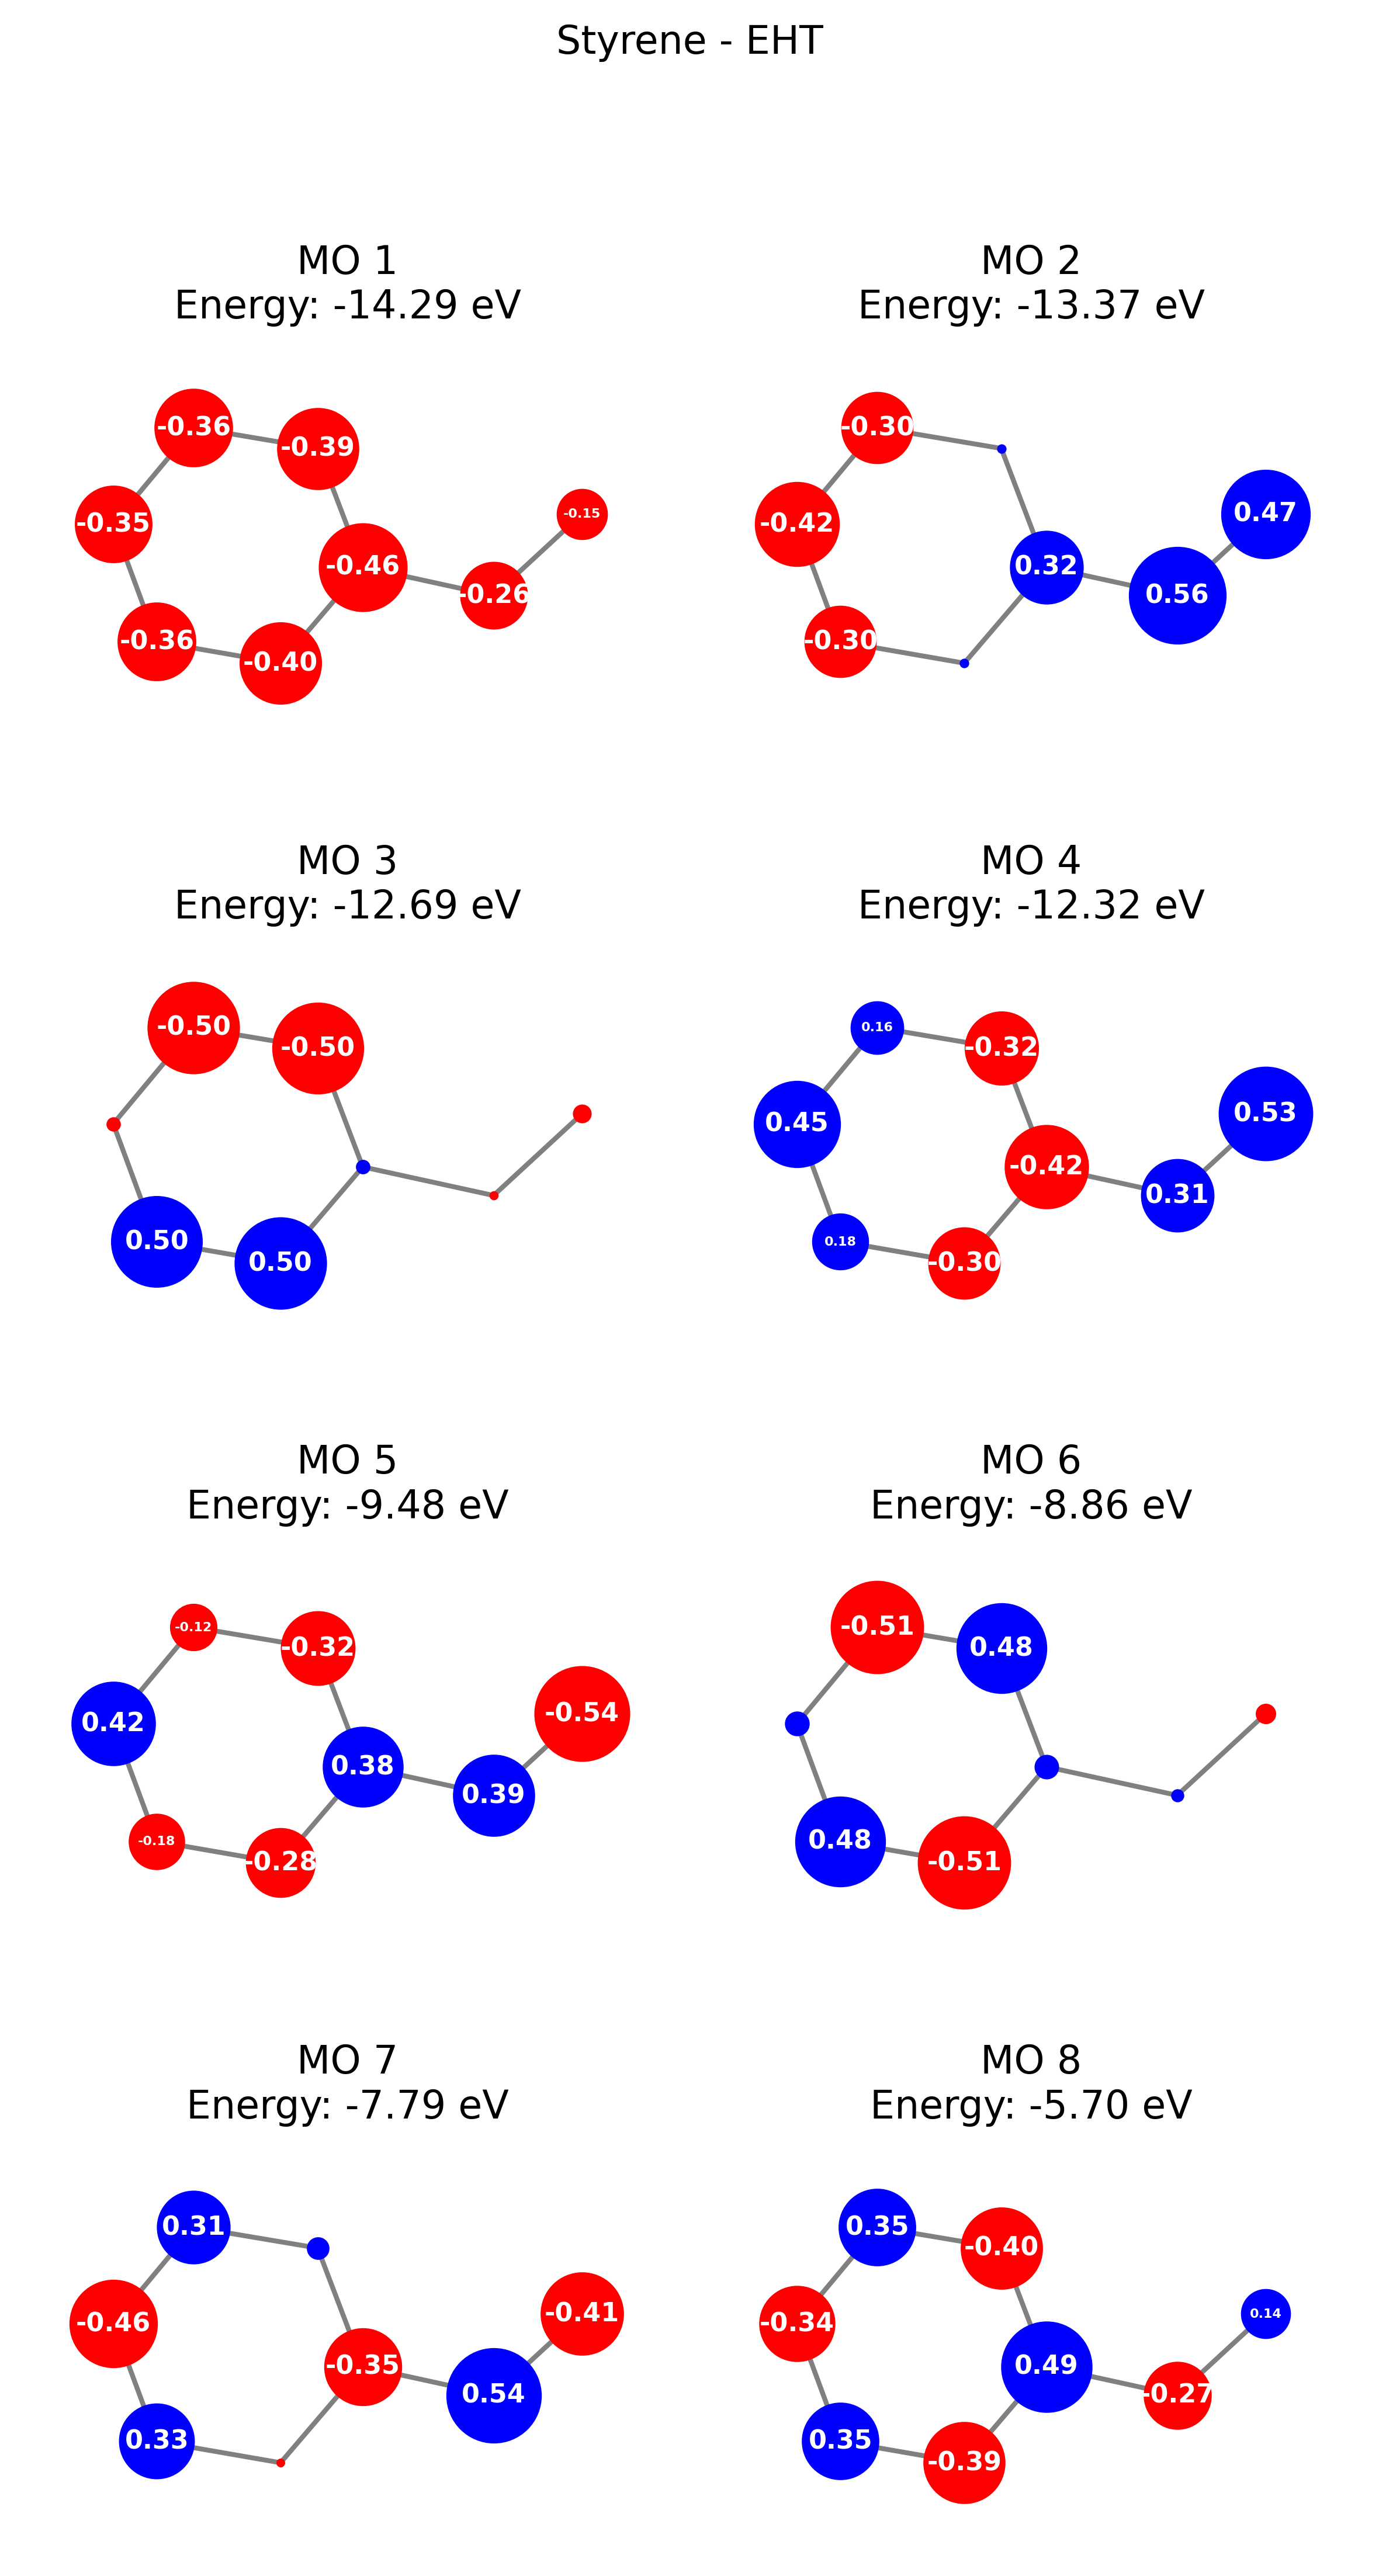

In [9]:
pts.plot_MOs(eigenvalues, C, coordinates, extra_bounds, 'Styrene', 'EHT', (6,12))

In [10]:
indices_valence_orbitals = [i for i, label in enumerate(styrene_molecule.ao_labels()) if 'C 2p'  in label or 'C 2s' in label or 'H 1s' in label]
valence_orbitals = [label for label in styrene_molecule.ao_labels() if 'C 2p'  in label or 'C 2s' in label or 'H 1s' in label]
alg_valence_orbitals = [label[2::].lstrip()[:4] for label in valence_orbitals]
pz_indices_full = [i for i, label in enumerate(valence_orbitals) if ('C 2px') in label]
print(styrene_molecule.ao_labels())
print(indices_valence_orbitals)
print(valence_orbitals)
print(alg_valence_orbitals)
print(pz_indices_full)

['0 C 1s    ', '0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 1s    ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 1s    ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ', '3 C 1s    ', '3 C 2s    ', '3 C 2px   ', '3 C 2py   ', '3 C 2pz   ', '4 C 1s    ', '4 C 2s    ', '4 C 2px   ', '4 C 2py   ', '4 C 2pz   ', '5 C 1s    ', '5 C 2s    ', '5 C 2px   ', '5 C 2py   ', '5 C 2pz   ', '6 C 1s    ', '6 C 2s    ', '6 C 2px   ', '6 C 2py   ', '6 C 2pz   ', '7 C 1s    ', '7 C 2s    ', '7 C 2px   ', '7 C 2py   ', '7 C 2pz   ', '8 H 1s    ', '9 H 1s    ', '10 H 1s    ', '11 H 1s    ', '12 H 1s    ', '13 H 1s    ', '14 H 1s    ', '15 H 1s    ']
[1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
['0 C 2s    ', '0 C 2px   ', '0 C 2py   ', '0 C 2pz   ', '1 C 2s    ', '1 C 2px   ', '1 C 2py   ', '1 C 2pz   ', '2 C 2s    ', '2 C 2px   ', '2 C 2py   ', '2 C 2pz   ',

In [11]:
IP = {
    'H 1s': 13.6,
    'C 2s': 21.4, 'C 2p': 11.4,
    'N 2s': 25.58, 'N 2p': 13.9,
    'O 2s': 32.38, 'O 2p': 15.85,
    'F 2s': 40.20, 'F 2p': 18.66
}

In [12]:
n = len(indices_valence_orbitals)
print(n)
H_full = np.zeros((n,n))

40


In [13]:
for i, label in enumerate(alg_valence_orbitals):
    alpha = IP[label] 
    H_full[i, i] = -alpha 
print(H_full)

[[-21.4   0.    0.  ...   0.    0.    0. ]
 [  0.  -11.4   0.  ...   0.    0.    0. ]
 [  0.    0.  -11.4 ...   0.    0.    0. ]
 ...
 [  0.    0.    0.  ... -13.6   0.    0. ]
 [  0.    0.    0.  ...   0.  -13.6   0. ]
 [  0.    0.    0.  ...   0.    0.  -13.6]]


In [14]:
S_full = hf.get_ovlp()[indices_valence_orbitals][:, indices_valence_orbitals]
for i in range(n):
    for j in range(n):
        if i != j:
            H_full[i, j] = H_full[j, i] = K*S_full[i,j]*(H_full[i,i]+H_full[j,j])/2
print(H_full)

[[-2.14000000e+01 -0.00000000e+00  2.24464781e-15 ... -1.26285056e-05
  -1.29576379e-03 -8.49781363e-01]
 [-0.00000000e+00 -1.14000000e+01 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 2.24464781e-15 -0.00000000e+00 -1.14000000e+01 ... -2.78594527e-07
  -7.98475021e-04 -5.11830467e-01]
 ...
 [-1.26285056e-05 -0.00000000e+00 -2.78594527e-07 ... -1.36000000e+01
  -1.23244495e+00 -2.07153843e-02]
 [-1.29576379e-03 -0.00000000e+00 -7.98475021e-04 ... -1.23244495e+00
  -1.36000000e+01 -1.31566237e+00]
 [-8.49781363e-01 -0.00000000e+00 -5.11830467e-01 ... -2.07153843e-02
  -1.31566237e+00 -1.36000000e+01]]


In [15]:
A = fractional_matrix_power(S_full, -0.5)
A = np.asarray(A)
ASA = A@S_full@A

In [16]:
H_p = A @ H_full @ A 
eigenvalues_full, C_p = np.linalg.eigh(H_p)

print(eigenvalues_full)
C = A @ C_p

for i in range(n):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]


C_0 = C[pz_indices_full,:]
print(C_0)

[-29.14721698 -27.11629857 -25.65587482 -24.89580441 -20.93997646
 -20.08661629 -18.93257927 -16.98046484 -16.26834532 -15.60994691
 -14.88649861 -14.75476735 -14.29367963 -14.26385741 -14.07384313
 -13.36531853 -13.349822   -13.14123739 -12.69327581 -12.32157408
  -9.48237094  -8.85922556  -7.79021503  -5.70167501   1.13954875
   1.87913814   3.76941871   6.15348098   7.06273512   7.67591653
   8.18191489   9.6615883   10.80722114  13.37139742  18.49771801
  19.79913234  28.04690161  29.39839658  35.77599307  41.42128832]
[[ 4.89693635e-16 -6.03666193e-17  7.01774122e-17  1.28483678e-16
   5.64785322e-16 -8.40392415e-16 -1.07160627e-15  1.15454401e-16
  -9.23446580e-16  4.51273439e-16  9.94988857e-17 -3.16346156e-15
  -1.45567731e-01 -1.27716399e-15  4.12846158e-15 -4.70751206e-01
  -1.09023989e-14  7.29089668e-16 -1.52168511e-02  5.27391995e-01
  -5.42636025e-01  1.86877050e-02 -4.06062001e-01  1.38347513e-01
  -1.49435662e-16  1.07722628e-16 -1.69237779e-16 -8.06266013e-17
   7.9888

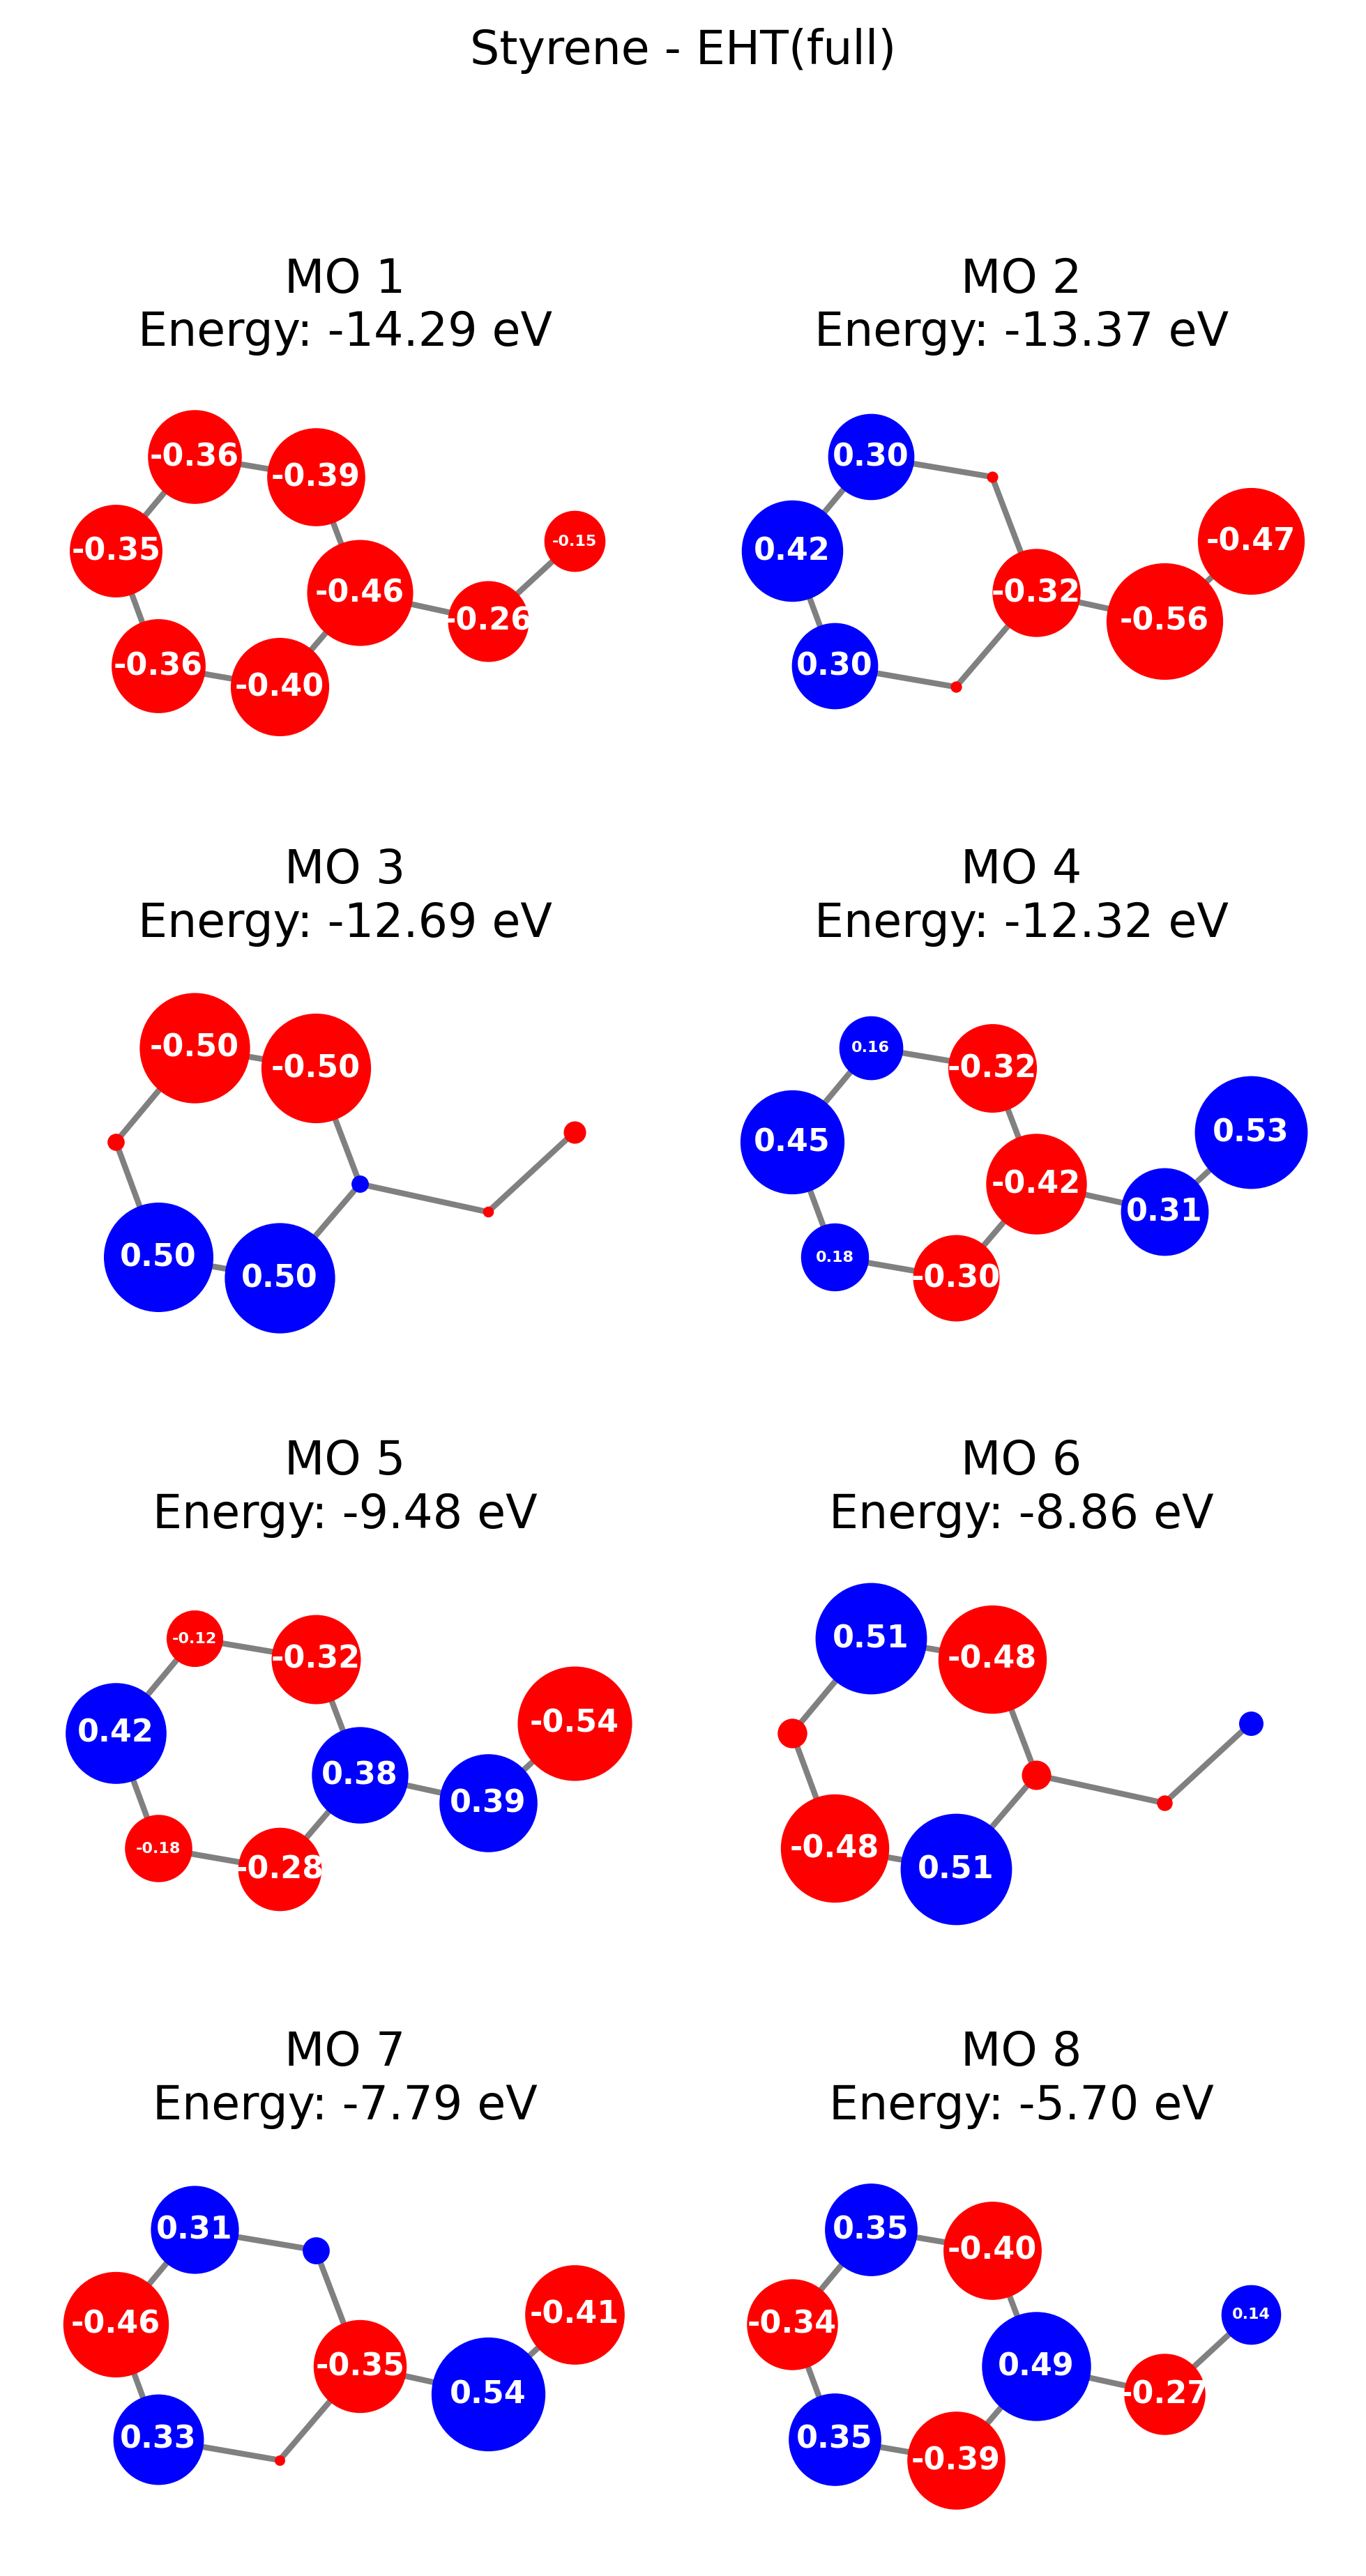

In [17]:
pts.plot_MOs(eigenvalues_full[[12,15,18,19,20,21,22,23]], C_0[:, [12,15,18,19,20,21,22,23]], coordinates, extra_bounds, 'Styrene', 'EHT(full)', (5,10))

In [18]:
number_of_electrons = 40
E = 0
D = np.zeros((number_of_electrons,number_of_electrons))

elec_to_place = number_of_electrons

for i in range(number_of_electrons):
    if elec_to_place > 1:
        elec_in_orbital = 2
    elif elec_to_place == 1:
        elec_in_orbital = 1
    else:
        elec_in_orbital = 0

    D += elec_in_orbital* ((C[:,i]).reshape(-1,1) @ (C[:,i]).reshape(1,-1))
    elec_to_place -= elec_in_orbital
    E += elec_in_orbital* eigenvalues_full[i]
print(E)
print(D.round(6))
print(np.diag(D))

-705.553995614519
[[ 1.437452 -0.        0.048523 ... -0.003498 -0.00222  -0.01841 ]
 [-0.        1.042341  0.       ...  0.       -0.       -0.      ]
 [ 0.048523  0.        0.858004 ...  0.002619  0.023507 -0.008262]
 ...
 [-0.003498  0.        0.002619 ...  0.917973 -0.096172  0.001512]
 [-0.00222  -0.        0.023507 ... -0.096172  0.950357 -0.106007]
 [-0.01841  -0.       -0.008262 ...  0.001512 -0.106007  0.897894]]
[1.43745188 1.04234106 0.85800417 0.86058926 1.45527755 0.97102081
 0.85719802 0.78591819 1.44847767 0.97485905 0.77563764 0.77816417
 1.4429625  1.00521819 0.79532189 0.80980261 1.43181968 0.99953308
 0.82054875 0.82040722 1.43027443 1.00082114 0.79798208 0.81973432
 1.43436897 0.99899983 0.83988679 0.81087715 1.44008695 1.00720684
 0.78041524 0.82593212 0.94383763 0.93657833 0.94301045 0.90778579
 0.94542381 0.91797307 0.95035743 0.89789422]


In [19]:
D_pz = D[pz_indices_full][:, pz_indices_full]
print(D_pz)

[[ 1.04234106e+00  9.37567373e-01 -7.75259685e-03 -2.16713770e-01
  -1.49802000e-03  1.74482686e-01  5.30523651e-03 -2.04144794e-01]
 [ 9.37567373e-01  9.71020810e-01  3.39821285e-01  2.06111004e-02
  -3.84312862e-02 -1.44005413e-02 -4.86136854e-02  1.32918750e-02]
 [-7.75259685e-03  3.39821285e-01  9.74859054e-01  6.29366723e-01
   8.21244288e-04 -3.13372395e-01  1.83127164e-03  6.24115828e-01]
 [-2.16713770e-01  2.06111004e-02  6.29366723e-01  1.00521819e+00
   6.73536724e-01 -2.17369188e-03 -3.20620913e-01  5.13905963e-03]
 [-1.49802000e-03 -3.84312862e-02  8.21244288e-04  6.73536724e-01
   9.99533079e-01  6.62433871e-01  4.24401194e-04 -3.25652218e-01]
 [ 1.74482686e-01 -1.44005413e-02 -3.13372395e-01 -2.17369188e-03
   6.62433871e-01  1.00082114e+00  6.57506061e-01 -2.81180989e-03]
 [ 5.30523651e-03 -4.86136854e-02  1.83127164e-03 -3.20620913e-01
   4.24401194e-04  6.57506061e-01  9.98999832e-01  6.80067673e-01]
 [-2.04144794e-01  1.32918750e-02  6.24115828e-01  5.13905963e-03
  -

In [20]:
print(np.diag(D_pz))

[1.04234106 0.97102081 0.97485905 1.00521819 0.99953308 1.00082114
 0.99899983 1.00720684]


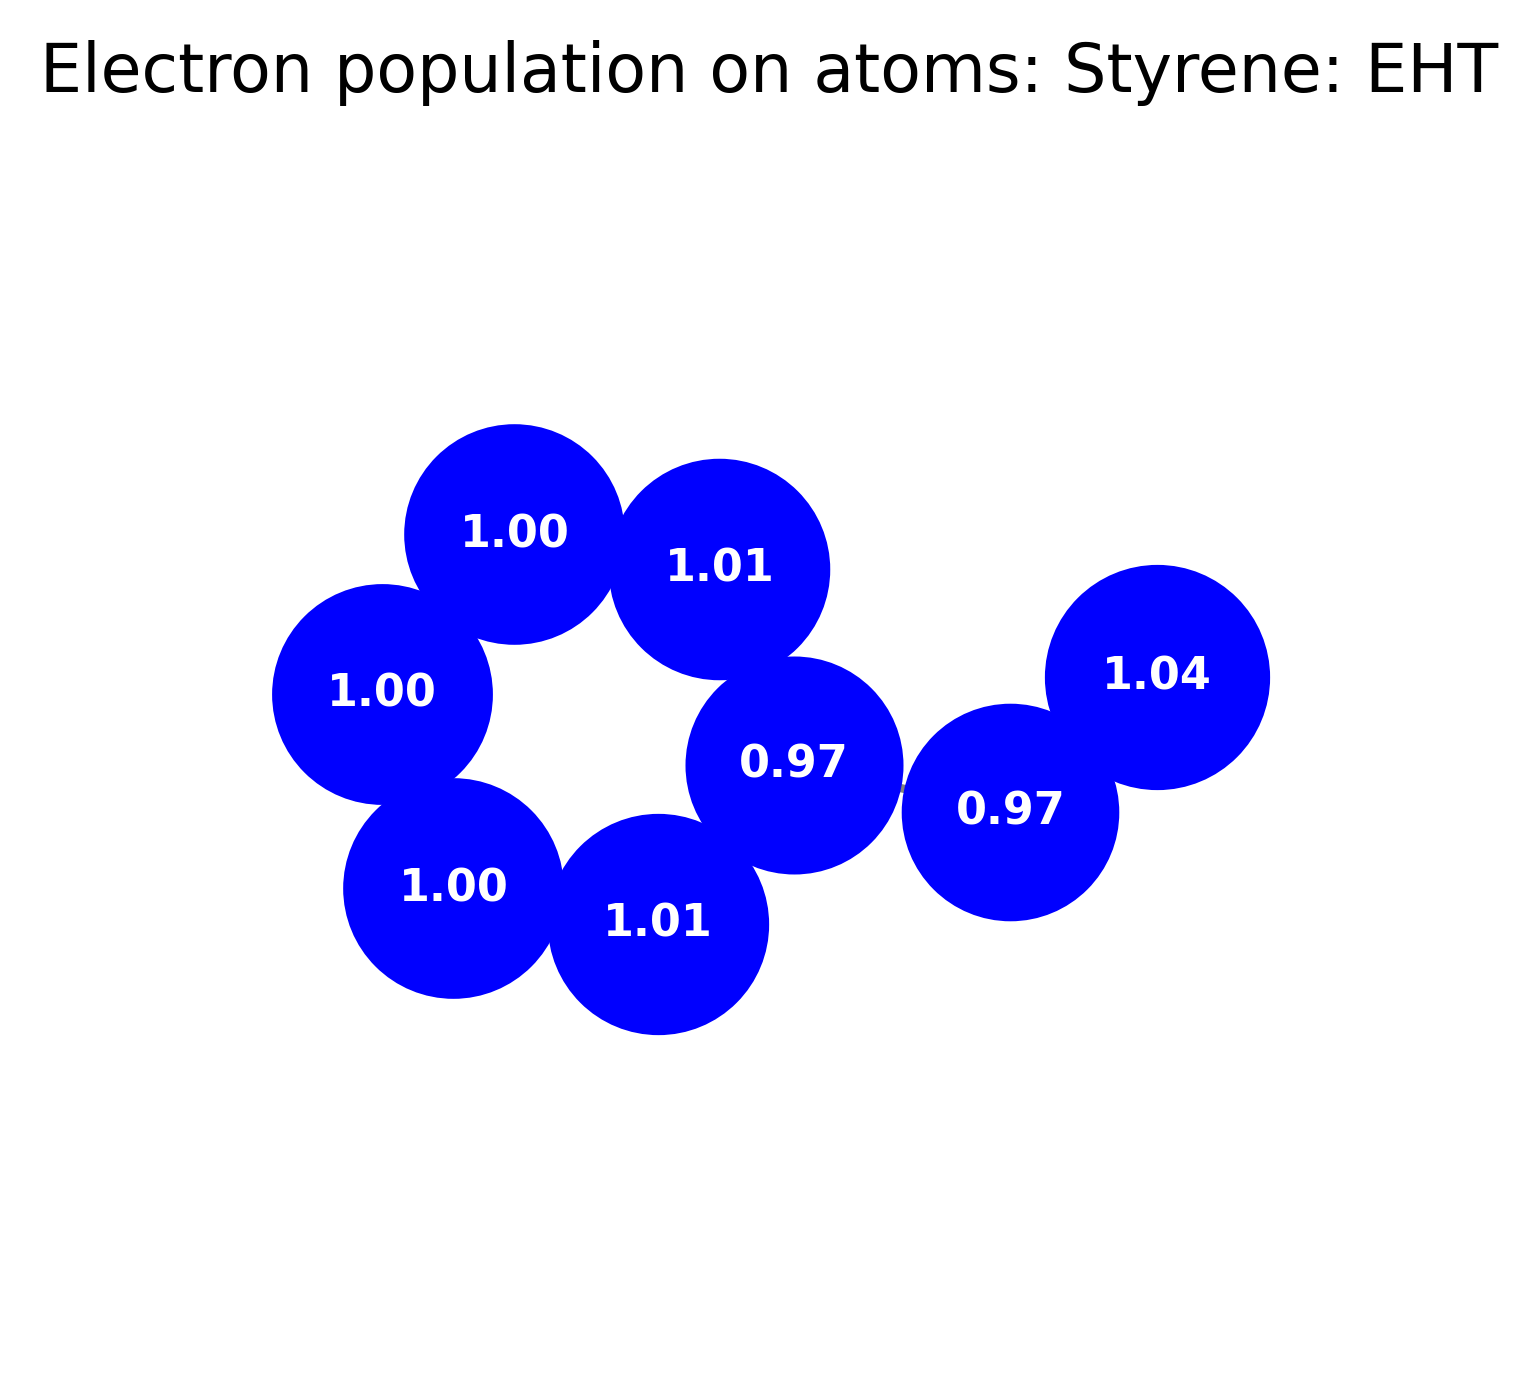

In [21]:
pts.plotting_of_D_atoms(8, coordinates, extra_bounds, D_pz, 'Styrene', 'EHT')